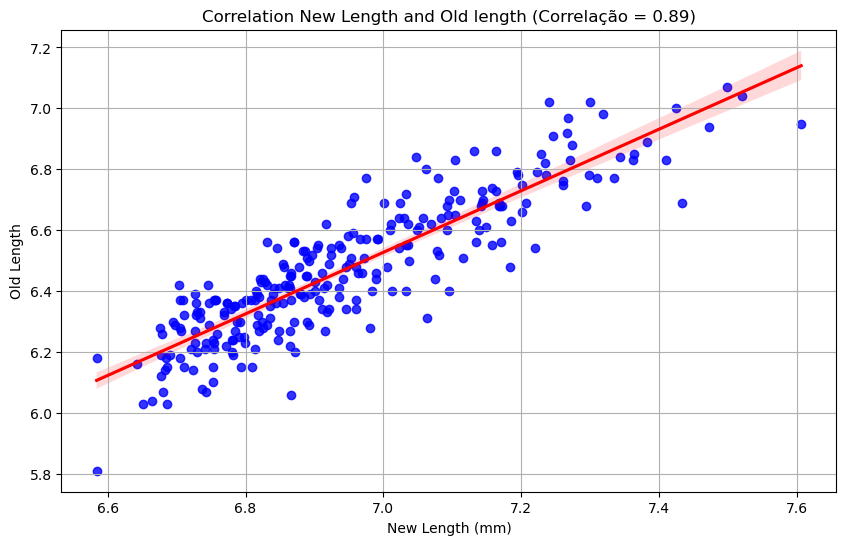

Resultado da correlação entre New Length (mm) e Old Length: 0.8852


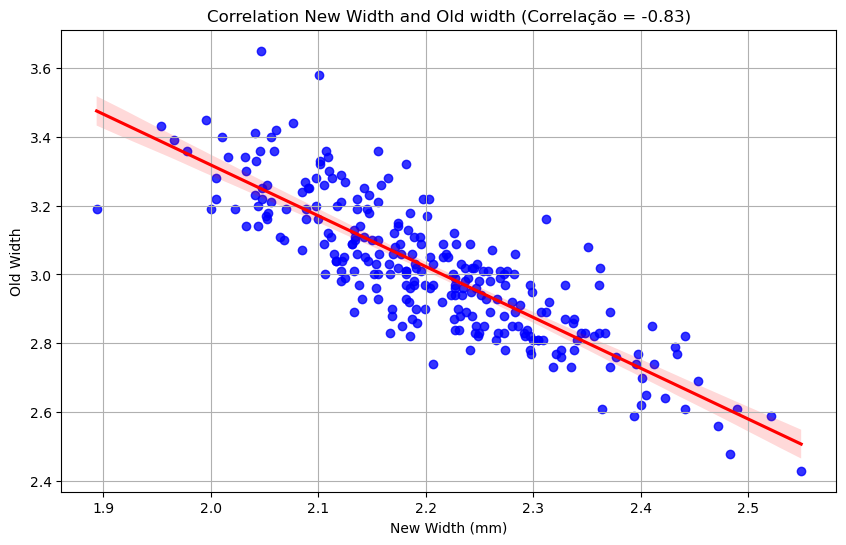

Resultado da correlação entre New Width (mm) e Old Width: -0.8342


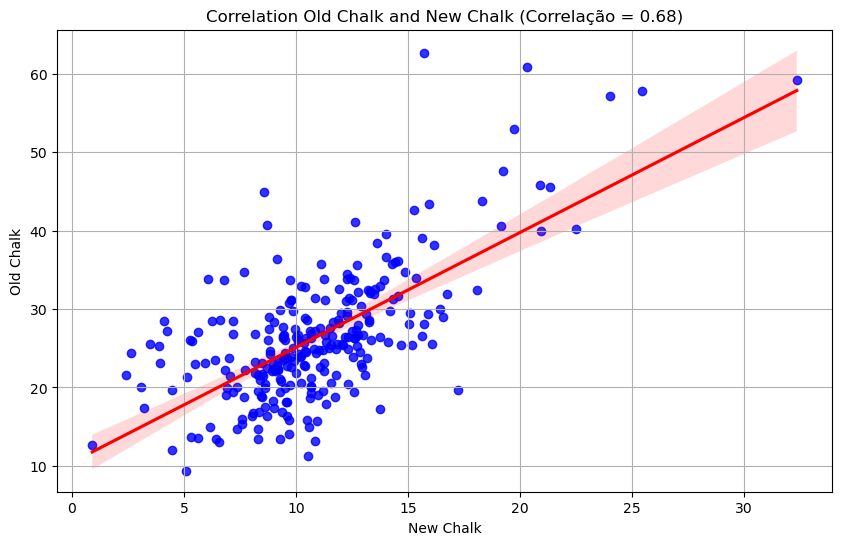

Resultado da correlação entre New Chalk e Old Chalk: 0.6758

Resumo dos resultados:
Correlation New Length and Old length: 0.8852
Correlation New Width and Old width: -0.8342
Correlation New Chalk and Old Chalk: 0.6758


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Carregar o arquivo Excel  
file_path = 'D://__ciencia_de_dados_python_2023//arroz//individual.xlsx'  # Atualize com o caminho correto
df = pd.read_excel(file_path)

# Desprezar as duas primeiras colunas
# Correlação entre a 3ª e a 4ª colunas (Median Length e Grain length average 2)
x1 = df.iloc[:, 2]  # 3ª coluna (Median Length)
y1 = df.iloc[:, 3]  # 4ª coluna (Grain length average 2)

# Correlação entre a 5ª e a 6ª colunas (Median Width e Grain length-width ratio average 2)
x2 = df.iloc[:, 4]  # 5ª coluna (Median Width)
y2 = df.iloc[:, 5]  # 6ª coluna (Grain length-width ratio average 2)

# Correlação entre a 7ª e a 8ª colunas (Chalk impact e Percentage of Chalky Grains)
x3 = df.iloc[:, 6]  # 7ª coluna (Chalk impact)
y3 = df.iloc[:, 7]  # 8ª coluna (Percentage of Chalky Grains)

# Função para calcular a correlação, exibir o gráfico e mostrar os resultados
def calcular_correlacao(x, y, x_label, y_label, title):
    # Remover valores não numéricos e valores ausentes
    x = pd.to_numeric(x, errors='coerce').replace([np.inf, -np.inf], np.nan)
    y = pd.to_numeric(y, errors='coerce').replace([np.inf, -np.inf], np.nan)

    # Limpar os dados (remover NaNs)
    mask = x.notna() & y.notna()
    x_clean = x[mask]
    y_clean = y[mask]

    # Verificar se há dados suficientes e calcular a correlação
    if len(x_clean) > 1 and len(y_clean) > 1:
        correlation, _ = pearsonr(x_clean, y_clean)

        # Criar gráfico de dispersão
        plt.figure(figsize=(10, 6))
        sns.regplot(x=x_clean, y=y_clean, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        plt.title(f'{title} (Correlação = {correlation:.2f})')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()

        # Exibir o valor da correlação
        print(f'Resultado da correlação entre {x_label} e {y_label}: {correlation:.4f}')
        return correlation
    else:
        print(f"Dados insuficientes para calcular a correlação entre {x_label} e {y_label}.")
        return None

# Correlação 1: Median Length vs Grain length average 2
correlacao_1 = calcular_correlacao(x1, y1, 'New Length (mm)', 'Old Length', 'Correlation New Length and Old length')

# Correlação 2: Median Width vs Grain length-width ratio average 2
correlacao_2 = calcular_correlacao(x2, y2, 'New Width (mm)', 'Old Width', 'Correlation New Width and Old width')

# Correlação 3: Chalk impact vs Percentage of Chalky Grains
correlacao_3 = calcular_correlacao(x3, y3, 'New Chalk', 'Old Chalk', 'Correlation Old Chalk and New Chalk')

# Exibir os resultados para discussão
print(f'\nResumo dos resultados:')
if correlacao_1 is not None:
    print(f'Correlation New Length and Old length: {correlacao_1:.4f}')
if correlacao_2 is not None:
    print(f'Correlation New Width and Old width: {correlacao_2:.4f}')
if correlacao_3 is not None:
    print(f'Correlation New Chalk and Old Chalk: {correlacao_3:.4f}')
